<a href="https://colab.research.google.com/github/seanb7/GEOL-450/blob/main/Oceanic_Lithosphere_Evolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is the spreading rate at the East Pacific Rise at 45 degrees South?
Mid Atlantic Ridge spreading rate = 23 mm/yr - 267.9 deg. North
East Pacific Rise spreading rate = 142 mm/yr - 103.7 deg. North

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cbook import get_sample_data
from matplotlib.colors import LightSource
from matplotlib import colors as mcolors

In [11]:
# Import CSV data created using GeoMapApp
data = pd.read_csv('MARSubsidence.csv')
data.tail()

data2 = pd.read_csv('EPRSubsidence.csv')
data2.tail()

,Longitude,Latitude,Distance (km),Elevation (m)
940,-171.80,-20.52,6008.2305,-5728.0664
941,-171.85,-20.48,6014.6220,-5727.8060
942,-171.89,-20.45,6021.0137,-5692.0930
943,-171.94,-20.41,6027.4053,-5680.1704
944,-171.98,-20.37,6033.7970,-5683.4310


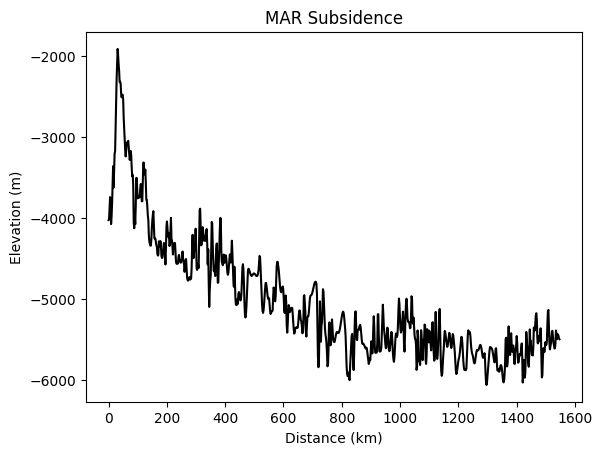

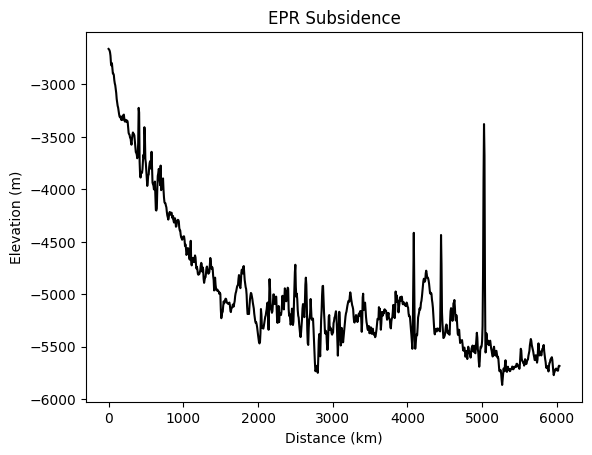

In [12]:
# Plot Data
plt.plot(data['Distance (km)'], data['Elevation (m)'], 'k')
plt.xlabel('Distance (km)')
plt.ylabel('Elevation (m)')
plt.title('MAR Subsidence')
plt.show()

plt.plot(data2['Distance (km)'], data2['Elevation (m)'], 'k')
plt.xlabel('Distance (km)')
plt.ylabel('Elevation (m)')
plt.title('EPR Subsidence')
plt.show()

In [39]:
# Covert Distance to Age
u_mar = 12.5 # km / Myr
u_epr = 71 # km / Myr

# d = r * t, t = d/r
dist_mar = (data['Distance (km)'])
dist_epr = (data2['Distance (km)'])

t_mar = dist_mar / u_mar
t_epr = dist_epr / u_epr

topo_mar = data['Elevation (m)']
topo_epr = data2['Elevation (m)']

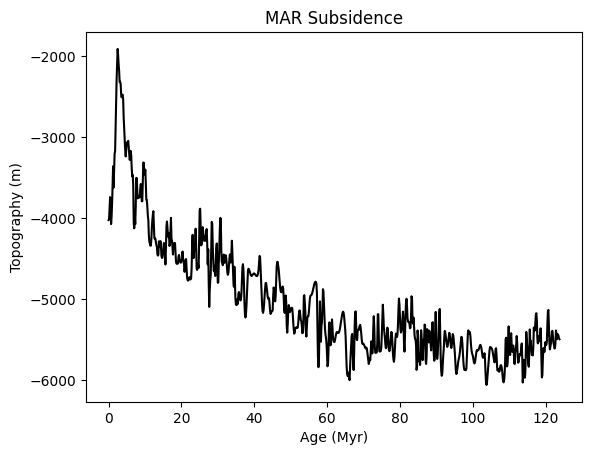

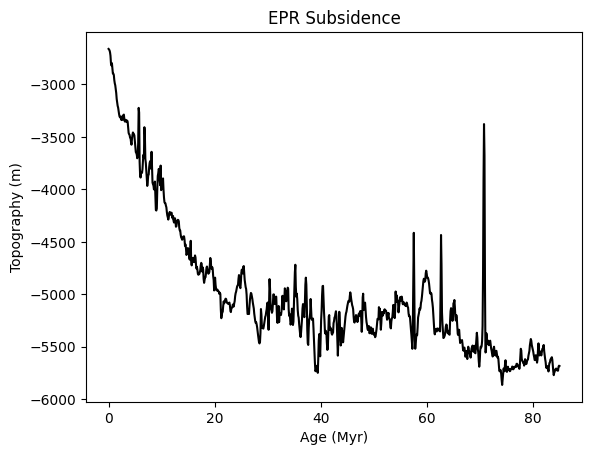

In [53]:
# Plot Topography (m) vs Age (Myr)
plt.plot(t_mar, data['Elevation (m)'], 'k')
plt.xlabel('Age (Myr)')
plt.ylabel('Topography (m)')
plt.title('MAR Subsidence')
plt.show()

plt.plot(t_epr, data2['Elevation (m)'], 'k')
plt.xlabel('Age (Myr)')
plt.ylabel('Topography (m)')
plt.title('EPR Subsidence')
plt.show()

In [55]:
# Define all of our parameters
alpha = 3.28e-5
Cp = 1171
k = 3.138
rhom = 3300
rhow = 1040
Tm = 1350

# Calculate the Thermal Diffusivity
kappa = k / (rhom * Cp) # m ^ 2 / s

# Conversion from Myr to sec
t_sec = 3.154e7 * 1e6

# Depth of the ridge axis
dr = 2600
dr2 = np.abs(np.max(topo_epr))


In [56]:
# Calculate Depth
d_mar = np.zeros(np.size(t_mar))
i = 0

for elem in topo_mar:
    d_mar[i] = dr + 2 * alpha * (((kappa * t_mar[i] * t_sec) / np.pi)**(1/2)) * ((rhom * Tm) / (rhom - rhow))
    i = i + 1

d_epr = np.zeros(np.size(t_epr))
i2 = 0

for elm in topo_epr:
    d_epr[i2] = dr2 + 2 * alpha * (((kappa * t_epr[i2] * t_sec) / np.pi)**(1/2)) * ((rhom * Tm) / (rhom - rhow))
    i2 = i2 + 1

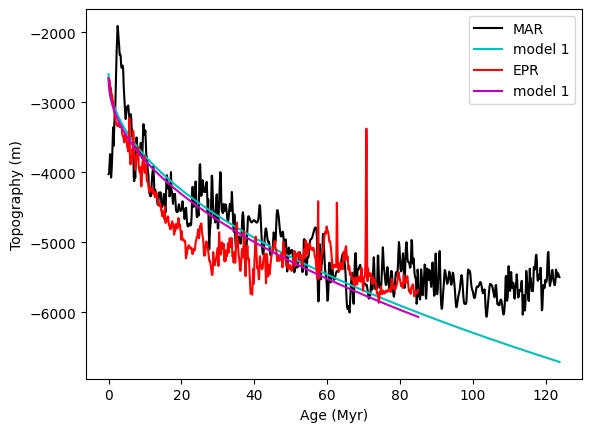

In [57]:
plt.plot(t_mar, topo_mar, 'k', label = 'MAR')
plt.plot(t_mar, -d_mar, 'c', label = 'model 1')
plt.plot(t_epr, topo_epr, 'r', label = 'EPR')
plt.plot(t_epr, -d_epr, 'm', label = 'model 1')
plt.xlabel('Age (Myr)')
plt.ylabel('Topography (m)')
plt.legend()
plt.show()

# Is the subsidence the same for plate age between the two locations? If not, how do they differ?
Subsidence is faster at the East Pacific Rise only by 40 Myr.


# How well does the model fit the data?
 Extremly well till reaching the 70Myr mark we dont see the rate of subsidence decressing as fast.

# Is there a plate age at which the model seems to stop working?
Looking at the data I would say around the 75Myr mark.

# What did Stein and Stein(1992) find in their study? How does it compare to your findings?
Stein and Stein's findings showed that sea-floor depth and thermal activity over a extended period of time is the main constraint of the thermal structure and evolution of the oceanic lithosphere.
In comparison to my data collected, the model predicts and matches recorded subsidence data, untill a certain era. After 70Myr or so the depth continues to delcine but our data shows it leveling off.